In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import read_summary

# Create a dataframe and units dict from any result summary files found:
pattern = './runs/*/result_summary.txt'
results, units = read_summary.df_from_pattern(pattern)

In [88]:
# Split results into separate bandwidth and IOPS dataframes, contained in a "metrics" variable:

# print('units:', units)
bw_unit = 'GiB/s'
iops_unit = 'kIOPS'
descr_cols = [c for c, u in units.items() if u is None]
bw_cols = [c for c, u in units.items() if u == bw_unit]
bw_results = results[descr_cols + bw_cols]
iops_cols = [c for c, u in units.items() if u == iops_unit]
iops_results = results[descr_cols + iops_cols]

metrics = {
    'bandwidth': {
        'name': 'Bandwidth',
        'cols': bw_cols,
        'results': bw_results,
        'unit': bw_unit,
    },
    'iops': {
        'name': 'IOPs',
        'cols': iops_cols,
        'results': iops_results,
        'unit': iops_unit,
    },
}

In [113]:
# Define utilities
def describe(df):
    """ Given a dataframe, return (constants, variables) where both are dicts keyed by column name.
        Values in constants are a single value.
        Values in variables are a single-column dataframe.
    """
    constants = {}
    variables = {}
    for c in df.columns:
        vs = set(df[c])
        if len(vs) == 1:
            constants[c] = df[c].iloc[0]
        else:
            variables[c] = df[c]
    return constants, variables

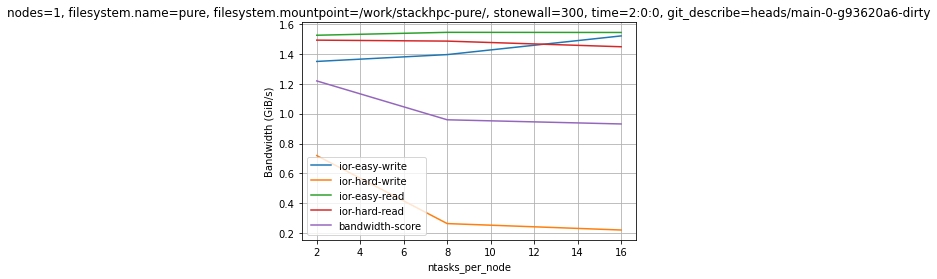

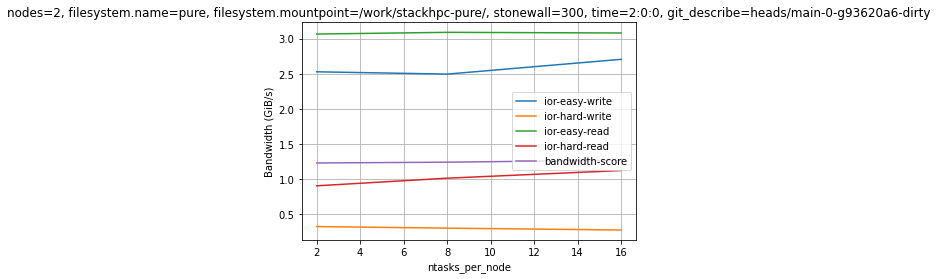

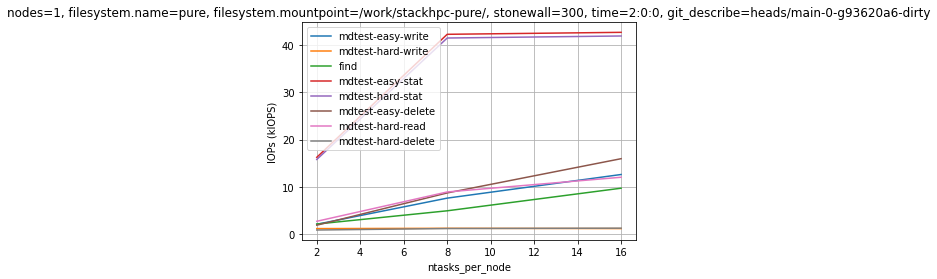

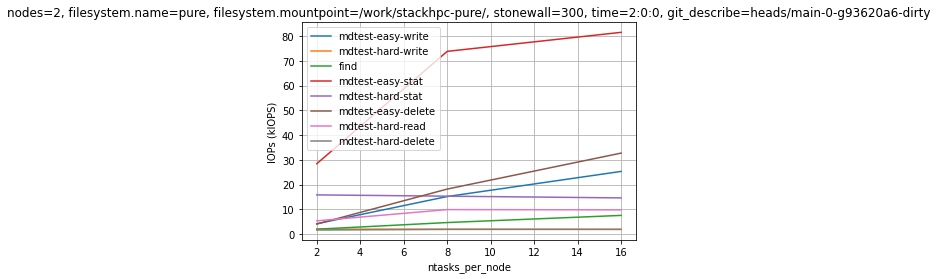

In [114]:
# fig, axs = plt.subplots(figsize=(8, 8), nrows=1)
for metric in metrics.values():
    for v, grp_results in metric['results'].groupby('nodes'):
        grp_constants, grp_vars = describe(grp_results[descr_cols])
        grp_descr = ', '.join([f'{k}={v}' for k, v in grp_constants.items()])
        grp_results.plot(x='ntasks_per_node', y=metric['cols'], title=grp_descr)
        plt.ylabel(f"{ metric['name'] } ({ metric['unit'] })")
        plt.legend()
        plt.grid()